Homework 4 - Multi-Class Classification 

Nishchay Patel

1. Importing the libraries needed and reading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [2]:
data = pd.read_csv('performance.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
print(data.sample(5))

      Adm_Year  Gender   Age  HSC_Pass_Year Program Merit_Scholarship  \
1003    2020.0    Male  20.0         2020.0    BCSE                No   
122     2021.0    Male  21.0         2020.0    BCSE                No   
74      2021.0    Male  21.0         2019.0    BCSE               Yes   
131     2019.0    Male  21.0         2018.0    BCSE                No   
1002    2021.0  Female  20.0         2020.0    BCSE                No   

     Uni_Transport Learn_Mode Smartphone   PC  ... SM_Hours1 Avg_Attendance1  \
1003           Yes    Offline        Yes  Yes  ...       3.0            87.0   
122             No    Offline        Yes  Yes  ...       2.0            98.0   
74             Yes     Online        Yes  Yes  ...       4.0            95.0   
131            Yes    Offline        Yes  Yes  ...       1.0           100.0   
1002           Yes    Offline        Yes  Yes  ...       3.0           100.0   

                                Skills1 Skill_Dev_Hours1 Interest_Area1  \
1003 

In [4]:
data.isnull().sum()

Adm_Year                                                                      0
Gender                                                                        0
Age                                                                           0
HSC_Pass_Year                                                                 0
Program                                                                       0
Merit_Scholarship                                                             0
Uni_Transport                                                                 0
Learn_Mode                                                                    0
Smartphone                                                                    0
PC                                                                            0
Eng_Proficiency                                                               0
Probation                                                                     0
Suspension                              

In [66]:
print(data.nunique())

Adm_Year                                                                       12
Gender                                                                          2
Age                                                                            10
HSC_Pass_Year                                                                  12
Program                                                                         1
Merit_Scholarship                                                               2
Uni_Transport                                                                   2
Learn_Mode                                                                      2
Smartphone                                                                      2
PC                                                                              2
Eng_Proficiency                                                                 3
Probation                                                                       2
Suspension      

Label Distribution:
Target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64


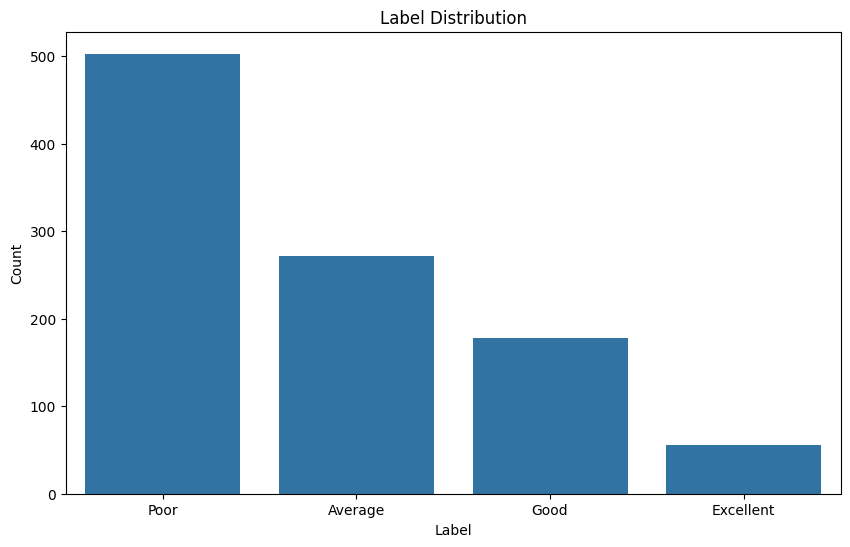

In [5]:

getting_count = data["Target"]

label_counts = getting_count.value_counts()
print("Label Distribution:")
print(label_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:

# Step 1: Make sure that your column names are correct
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores

# Step 2: Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Target'])  # Target variable encoded

# Step 3: Select the feature columns (X) by dropping the target column
X = data.drop('Target', axis=1)

# Step 4: Define the categorical columns (nominal and ordinal)
categorical_columns_nominal = ['Gender', 'Merit_Scholarship', 'Uni_Transport', 'Learn_Mode', 'Smartphone', 'PC', 'Program', 'Skills1', 'Interest_Area1']
categorical_columns_ordinal = ['Eng_Proficiency', 'Relationship']  # Modify if needed based on the unique counts

# Step 5: Define the numerical columns
numerical_columns = ['Age', 'Adm_Year', 'HSC_Pass_Year', 'Curr_Sem1', 'Study_Hours1', 
                     'Study_Sessions1', 'SM_Hours1', 'Avg_Attendance1', 'Skill_Dev_Hours1', 
                     'Prev_SGPA1', 'Curr_CGPA1', 'Completed_Credits1', 'Family_Income1']

# Step 6: Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        # OneHotEncoder for nominal categorical columns
        ('cat_nominal', OneHotEncoder(drop='first'), categorical_columns_nominal),
        
        # StandardScaler for numerical columns
        ('num', StandardScaler(), numerical_columns)
    ])

# Step 7: Apply ColumnTransformer to the feature set (X) to preprocess the data
X_processed = preprocessor.fit_transform(X)

# Step 8: Split the dataset into training (70%) and testing (30%) sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Now, X_train, X_test, y_train, and y_test are ready for use in machine learning tasks.


In [7]:
X_train_dense = X_train.toarray()

# Convert to DataFrame for sampling (optional)
X_train_df = pd.DataFrame(X_train_dense)

# Now you can sample
X_train_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
674,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.138715,-1.113991,-1.031837,-0.180176,-0.504694,-0.831491,0.039084,-0.083878,-0.564587,-0.296524
357,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.142464,-0.636829,-1.031837,1.460410,0.117540,-0.152709,-0.252431,0.490414,0.148049,0.460695
661,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.119970,-0.159666,-0.064700,-0.590322,0.739774,-0.831491,-1.418494,-0.726538,1.384681,1.015989


In [8]:
X_test_dense = X_test.toarray()

# Convert to DataFrame for sampling (optional)
X_test_df = pd.DataFrame(X_test_dense)

# Now you can sample
X_test_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
268,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.142464,1.271821,1.869576,0.229971,0.739774,-0.152709,-1.651706,-0.931642,0.399567,0.460695
88,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.153710,-0.398247,-0.064700,-0.590322,0.428657,-0.831491,1.310093,0.914296,-1.382022,-0.359626
283,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.123719,-0.636829,0.902438,-0.590322,-2.682513,1.204855,-0.345716,0.422046,1.321801,0.460695


In [9]:
y_train_df = pd.DataFrame(y_train, columns=['Target'])
y_test_df = pd.DataFrame(y_test, columns=['Target'])

In [10]:
print(X_train_df.shape,y_train_df.shape)
print(X_test_df.shape,y_test_df.shape)

(706, 107) (706, 1)
(303, 107) (303, 1)


/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Logistic Regression Accuracy:  0.7524752475247525
Support Vector Machine Accuracy:  0.768976897689769
MLP Classifier Accuracy:  0.7458745874587459

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58        73
           1       0.62      0.42      0.50        12
           2       0.62      0.62      0.62        65
           3       0.88      0.93      0.90       153

    accuracy                           0.75       303
   macro avg       0.68      0.63      0.65       303
weighted avg       0.74      0.75      0.75       303


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        73
           1       0.60      0.25      0.35        12
           2       0.69      0.69      0.69        65
           3       0.89      0.92      0.90       153

    accuracy                           0.77       303
 

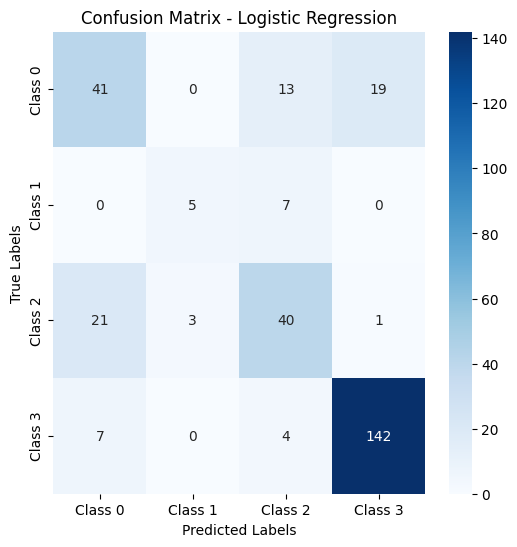

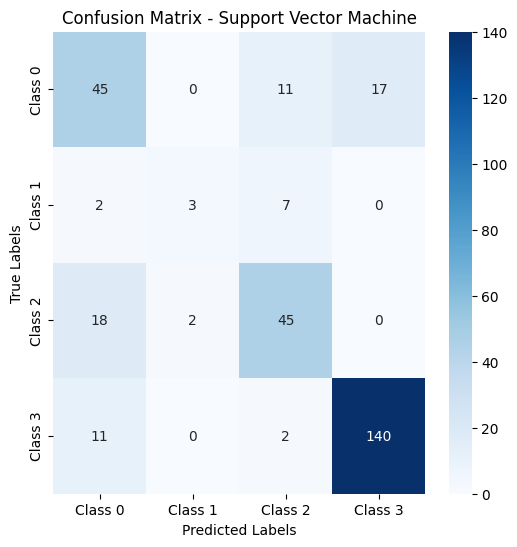

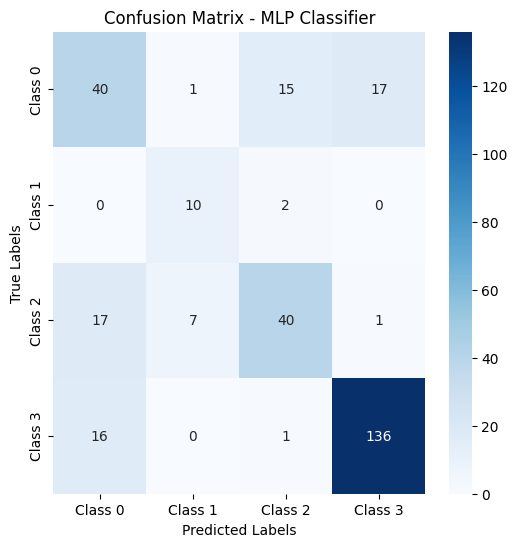

In [11]:



log_reg = LogisticRegression(solver='saga', random_state=0)
log_reg.fit(X_train_df, y_train_df)

svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_df, y_train_df)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_df, y_train_df)

log_reg_pred = log_reg.predict(X_test_df)
svm_pred = svm.predict(X_test_df)
mlp_pred = mlp.predict(X_test_df)

log_reg_accuracy = accuracy_score(y_test_df, log_reg_pred)
svm_accuracy = accuracy_score(y_test_df, svm_pred)
mlp_accuracy = accuracy_score(y_test_df, mlp_pred)

print("Logistic Regression Accuracy: ", log_reg_accuracy)
print("Support Vector Machine Accuracy: ", svm_accuracy)
print("MLP Classifier Accuracy: ", mlp_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_df, log_reg_pred))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test_df, svm_pred))

print("\nMLP Classifier Classification Report:")
print(classification_report(y_test_df, mlp_pred))


def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test_df, log_reg_pred, "Logistic Regression")
plot_confusion_matrix(y_test_df, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y_test_df, mlp_pred, "MLP Classifier")


In [12]:


# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning)  # General user warnings


# Step 1: Define hyperparameters for tuning

# Logistic Regression and SVM: Tune the 'C' parameter
param_grid_log_reg_svm = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}

# MLP Classifier: Tune 'hidden_layer_sizes'
param_grid_mlp = {'hidden_layer_sizes': [(128,), (64, 64), (128, 64), (128, 64, 32)]}

# Step 2: Set up GridSearchCV for Logistic Regression and SVM
log_reg = LogisticRegression(solver='saga', random_state=0)
svm = SVC(kernel='rbf', random_state=0)

# Perform GridSearchCV for Logistic Regression and SVM
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg_svm, cv=10, scoring='accuracy')
grid_search_svm = GridSearchCV(svm, param_grid_log_reg_svm, cv=10, scoring='accuracy')

# Reshape y_train and y_test to 1D
y_train_1d = y_train_df.values.ravel()
y_test_1d = y_test_df.values.ravel()

# Fit the models on the training data
grid_search_log_reg.fit(X_train_df, y_train_1d)
grid_search_svm.fit(X_train_df, y_train_1d)

# Step 3: Set up GridSearchCV for MLP
mlp = MLPClassifier(random_state=0)

# Perform GridSearchCV for MLP
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')

# Fit the MLP model on the training data
grid_search_mlp.fit(X_train_df, y_train_1d)

# Step 4: Output the best parameters and the best score for each model

# Logistic Regression Best Parameters and Score
print("Best parameters for Logistic Regression: ", grid_search_log_reg.best_params_)
print("Best cross-validation accuracy for Logistic Regression: ", grid_search_log_reg.best_score_)

# SVM Best Parameters and Score
print("Best parameters for SVM: ", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM: ", grid_search_svm.best_score_)

# MLP Best Parameters and Score
print("Best parameters for MLP: ", grid_search_mlp.best_params_)
print("Best cross-validation accuracy for MLP: ", grid_search_mlp.best_score_)

# Step 5: Evaluate the best models on the test set

# Logistic Regression Evaluation
best_log_reg = grid_search_log_reg.best_estimator_
log_reg_pred = best_log_reg.predict(X_test_df)
log_reg_accuracy = accuracy_score(y_test_1d, log_reg_pred)
print("Logistic Regression Test Accuracy: ", log_reg_accuracy)

# SVM Evaluation
best_svm = grid_search_svm.best_estimator_
svm_pred = best_svm.predict(X_test_df)
svm_accuracy = accuracy_score(y_test_1d, svm_pred)
print("SVM Test Accuracy: ", svm_accuracy)

# MLP Evaluation
best_mlp = grid_search_mlp.best_estimator_
mlp_pred = best_mlp.predict(X_test_df)
mlp_accuracy = accuracy_score(y_test_1d, mlp_pred)
print("MLP Test Accuracy: ", mlp_accuracy)


Best parameters for Logistic Regression:  {'C': 1}
Best cross-validation accuracy for Logistic Regression:  0.7663782696177062
Best parameters for SVM:  {'C': 20}
Best cross-validation accuracy for SVM:  0.8145271629778671
Best parameters for MLP:  {'hidden_layer_sizes': (128, 64, 32)}
Best cross-validation accuracy for MLP:  0.8088003196483868
Logistic Regression Test Accuracy:  0.7524752475247525
SVM Test Accuracy:  0.7755775577557755
MLP Test Accuracy:  0.768976897689769


Logistic Regression - Test Accuracy: 0.7524752475247525
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.58        73
           1       0.62      0.42      0.50        12
           2       0.62      0.62      0.62        65
           3       0.88      0.93      0.90       153

    accuracy                           0.75       303
   macro avg       0.68      0.63      0.65       303
weighted avg       0.74      0.75      0.75       303

SVM - Test Accuracy: 0.7755775577557755
SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64        73
           1       0.45      0.75      0.56        12
           2       0.75      0.60      0.67        65
           3       0.90      0.91      0.91       153

    accuracy                           0.78       303
   macro avg       0.68      0.73      0.69       303
weighted avg 

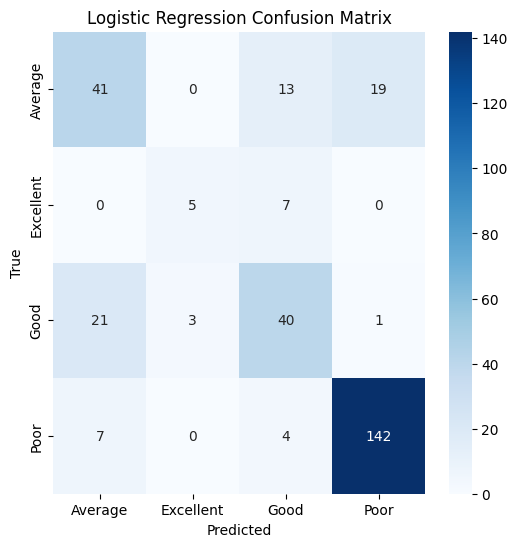

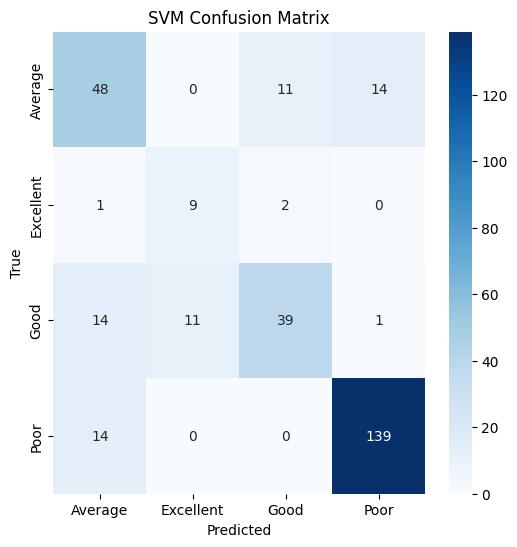

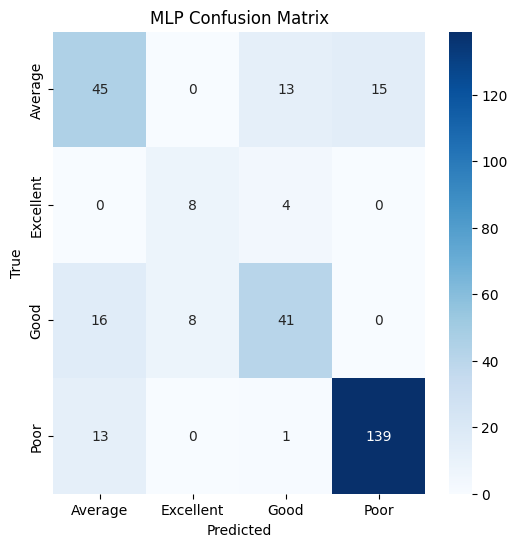

In [13]:

# Step 1: Retrain models with optimal hyperparameters obtained from GridSearchCV
warnings.filterwarnings('ignore', category=UserWarning)  # General user warnings

# Logistic Regression with optimal C value
best_log_reg = LogisticRegression(solver='saga', C=grid_search_log_reg.best_params_['C'], random_state=0)
best_log_reg.fit(X_train_df, y_train_df)

# SVM with optimal C value
best_svm = SVC(kernel='rbf', C=grid_search_svm.best_params_['C'], random_state=0)
best_svm.fit(X_train_df, y_train_df)

# MLP with optimal hidden_layer_sizes
best_mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], random_state=0)
best_mlp.fit(X_train_df, y_train_df)

# Step 2: Evaluate models on the test set

# Logistic Regression Evaluation
log_reg_pred = best_log_reg.predict(X_test_df)
log_reg_accuracy = accuracy_score(y_test_df, log_reg_pred)
log_reg_class_report = classification_report(y_test_df, log_reg_pred)

# SVM Evaluation
svm_pred = best_svm.predict(X_test_df)
svm_accuracy = accuracy_score(y_test_df, svm_pred)
svm_class_report = classification_report(y_test_df, svm_pred)

# MLP Evaluation
mlp_pred = best_mlp.predict(X_test_df)
mlp_accuracy = accuracy_score(y_test_df, mlp_pred)
mlp_class_report = classification_report(y_test_df, mlp_pred)

# Step 3: Output the results

print("Logistic Regression - Test Accuracy:", log_reg_accuracy)
print("Logistic Regression - Classification Report:\n", log_reg_class_report)

print("SVM - Test Accuracy:", svm_accuracy)
print("SVM - Classification Report:\n", svm_class_report)

print("MLP - Test Accuracy:", mlp_accuracy)
print("MLP - Classification Report:\n", mlp_class_report)

# Step 4: Plot Confusion Matrices for each model

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test_df, log_reg_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test_df, svm_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for MLP
mlp_cm = confusion_matrix(y_test_df, mlp_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Step 6

Performance Comparison Analysis
----
Before Hyperparameter Tuning

Logistic Regression: 75.25%

SVM: 76.90%

MLP: 74.59%

After Hyperparameter Tuning
----
Logistic Regression: 75.25% (unchanged)

SVM: 77.56% (improved by 0.66%)

MLP: 76.90% (improved by 2.31%)

Model Performance Analysis
----
Best Performing Model

SVM consistently performed the best, both before and after tuning

The improvements from hyperparameter tuning were minimal, suggesting the models were already well-configured for the dataset

Class-wise Performance
----
Class 3 shows the highest performance across all models (88-90% precision)

Class 1 shows the most inconsistent performance across models

Classes 0 and 2 show moderate performance (55-75% range)

Possible Reason
----
1. Class Imbalance

    Class 3 has 153 samples

    Class 1 has only 12 samples

    This significant imbalance affects model learning

2. Feature Representation

    Classes 0 and 1 might have overlapping features

    The models struggle to find clear decision boundaries for these classes

3. Data Quality

    The small sample size for Class 1 might not capture all possible variations

    Features might not be discriminative enough for certain classes